# Author: Стурейко Игорь
## Project: Geekbrains.MatStat
## Lesson 03 - Описательные статистики
## Date: 2020-06-29

## 1. Даны значения зарплат из выборки выпускников: 

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150

Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек numpy, pandas и др.) посчитать среднее арифметическое, смещённую и несмещённую оценки дисперсии, среднее квадратичное отклонение для данной выборки.
Можно затем посчитать те же значения с использованием библиотек, чтобы проверить себя.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
a = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150])
a

array([100,  80,  75,  77,  89,  33,  45,  25,  65,  17,  30, 230,  24,
        57,  55,  70,  75,  65,  84,  90, 150])

### Среднее арифметическое $\displaystyle \overline{X} = \dfrac{1}{n} \displaystyle\sum_{i = 1}^n x_i$

In [3]:
a_mean = a.sum()/len(a)
a_mean

73.14285714285714

In [4]:
a.mean()

73.14285714285714

### Смещенная $\displaystyle \sigma_X^2 = \dfrac{1}{n} \displaystyle\sum_{i = 1}^n \left( x_i - \overline{X} \right)^2$ и не смещенная $\displaystyle \sigma_{X, \: unbiased}^2 = \dfrac{1}{n - 1} \displaystyle\sum_{i = 1}^n \left( x_i - \overline{X} \right)^2$ оценка дисперсии

In [5]:
D = ((a-a_mean)**2).sum()/len(a)
D

2135.0748299319725

In [6]:
a.var()

2135.0748299319725

In [7]:
D_un = ((a-a_mean)**2).sum()/(len(a)-1)
D_un

2241.828571428571

In [8]:
a.var(ddof=1)

2241.828571428571

### Среднеквадратичное отклонение, cмещённая и несмещённая оценки:
$$\sigma_X = \sqrt{\dfrac{1}{n} \displaystyle\sum_{i = 1}^n \left( x_i - \overline{X} \right)^2}, \:\:
\sigma_{X, \: unbiased} = \sqrt{\dfrac{1}{n - 1} \displaystyle\sum_{i = 1}^n \left( x_i - \overline{X} \right)^2}$$

In [9]:
s = np.sqrt(D)
s

46.206869943028735

In [10]:
s_un = np.sqrt(D_un)
s_un

47.347952135531386

In [11]:
a.std()

46.206869943028735

In [12]:
a.std(ddof=1)

47.347952135531386

## 2. Для выборки из задачи 1 найти (также без использования библиотек):
1. медиану, первый и третий квартили, интерквартильное расстояние,
2. выборсы в выборке (используя для этого метод как при построении "усов" из boxplot).
Возможные неоднозначности в вычислении квантилей можно разрешать любым способом.

In [13]:
a = pd.DataFrame({'Val':a})

#### Мода

In [14]:
a['Val'].value_counts().head(3)

65    2
75    2
70    1
Name: Val, dtype: int64

In [15]:
a['Val'].mode()

0    65
1    75
dtype: int64

#### Медиана

In [16]:
a_sort = sorted(a['Val'])
length = len(a_sort)
length

21

In [17]:
med_ind = (length) // 2
med_ind

10

In [18]:
a_sort[med_ind]

70

In [19]:
a.median()

Val    70.0
dtype: float64

#### Квартили

In [20]:
a1 = a_sort[(length // 2 + 1) // 2]
a1

45

In [21]:
a3 = a_sort[(length * 3 // 2 + 1) // 2 - 1]
a3

84

In [22]:
a['Val'].quantile([0.25, 0.75])

0.25    45.0
0.75    84.0
Name: Val, dtype: float64

#### Интерквартильный размах

In [23]:
a_inter = [a1, a3]
a_inter_val = a_inter[1]-a_inter[0]
a_inter, a_inter_val

([45, 84], 39)

In [24]:
np.quantile(a, [0.25, 0.75])

array([45., 84.])

#### Усы

In [25]:
a_min = a1-1.5*a_inter_val
a_min

-13.5

In [26]:
a_max = a3+1.5*a_inter_val
a_max

142.5

#### Выбросы

In [27]:
out = []
for i in a['Val']:
    if i < a_min or i > a_max:
        out.append(i)
out

[230, 150]

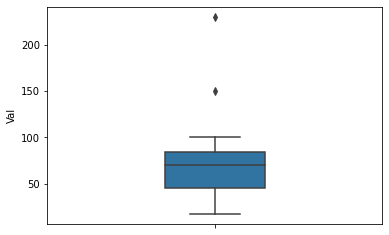

In [28]:
import seaborn as sns
sns.boxplot(a['Val'], orient='v',width=0.3)
plt.show()

## 3. В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?
Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

In [29]:
students = [0.25, 0.25, 0.5]
results = [0.8, 0.7, 0.9]

In [30]:
Prob_A = 0.25*0.8/np.inner(students, results)
Prob_A

0.24242424242424246

In [31]:
Prob_B = 0.25*0.7/np.inner(students, results)
Prob_B

0.21212121212121213

In [32]:
Prob_C = 0.5*0.9/np.inner(students, results)
Prob_C

0.5454545454545455